In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [7]:
df = pd.read_csv(r"C:\Users\Rugved\Downloads\temperatures.csv")

print(df.head(5))

   YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47  29.97   
1  1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80  29.12   
2  1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85  29.04   
3  1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04  29.20   
4  1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12  30.67   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2  26.08  23.65   28.47    24.24    30.71    30.92    26.26  
3  26.36  23.63   28.49    23.62    30.95    30.66    26.40  
4  27.52  23.82   28.30    22.25    30.00    31.33    26.57  


In [23]:
print("Data types of dataset")
print(df.dtypes) #to check wether any tranformation required

print("Null values in data")
print(df.isnull().sum()) #to see any null values to be removed/replaced

print(df.columns)

Data types of dataset
YEAR         int64
JAN        float64
FEB        float64
MAR        float64
APR        float64
MAY        float64
JUN        float64
JUL        float64
AUG        float64
SEP        float64
OCT        float64
NOV        float64
DEC        float64
ANNUAL     float64
JAN-FEB    float64
MAR-MAY    float64
JUN-SEP    float64
OCT-DEC    float64
dtype: object
Null values in data
YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64
Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')


In [19]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [69]:
months = [ "JAN" , "FEB", "MAR" , "APR", "MAY" , "JUN" , "JUL" , "AUG" , "SEP" , "OCT" , "NOV" , "DEC" ]

predictions ={}

#Labelling
X = df[["YEAR"]]
for month in months:
    y = df[month]

# Split data into train & test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict temperatures
    y_pred = model.predict(X_test)

    # Store predictions
    predictions[month] = y_pred

    # Print Model Performance
    print(f"\n Performance for {month}:")
    print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred):.2f}")
    print(f"R-squared Score: {metrics.r2_score(y_test, y_pred):.2f}")


 Performance for JAN:
Mean Absolute Error: 0.51
Mean Squared Error: 0.56
R-squared Score: 0.46

 Performance for FEB:
Mean Absolute Error: 0.63
Mean Squared Error: 0.82
R-squared Score: 0.53

 Performance for MAR:
Mean Absolute Error: 0.78
Mean Squared Error: 1.01
R-squared Score: 0.41

 Performance for APR:
Mean Absolute Error: 0.64
Mean Squared Error: 0.76
R-squared Score: 0.36

 Performance for MAY:
Mean Absolute Error: 0.54
Mean Squared Error: 0.45
R-squared Score: 0.22

 Performance for JUN:
Mean Absolute Error: 0.50
Mean Squared Error: 0.38
R-squared Score: -0.07

 Performance for JUL:
Mean Absolute Error: 0.35
Mean Squared Error: 0.22
R-squared Score: -0.05

 Performance for AUG:
Mean Absolute Error: 0.35
Mean Squared Error: 0.19
R-squared Score: -0.03

 Performance for SEP:
Mean Absolute Error: 0.21
Mean Squared Error: 0.08
R-squared Score: 0.61

 Performance for OCT:
Mean Absolute Error: 0.57
Mean Squared Error: 0.53
R-squared Score: 0.06

 Performance for NOV:
Mean Absolute 

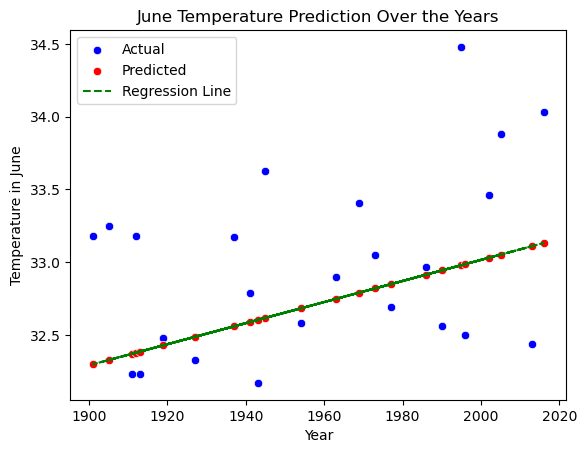

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Scatterplot for June's temperature prediction
sns.scatterplot(x=X_test["YEAR"], y=df.loc[X_test.index, "JUN"], label="Actual", color="blue")
sns.scatterplot(x=X_test["YEAR"], y=predictions["JUN"], label="Predicted", color="red")

plt.plot(X_test["YEAR"], predictions["JUN"], color="green", linestyle="dashed", label="Regression Line")
plt.xlabel("Year")
plt.ylabel("Temperature in June")
plt.title("June Temperature Prediction Over the Years")
plt.legend()
plt.show()

